<a href="https://colab.research.google.com/github/jubotero/cursoML/blob/master/SummanS03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Curso de Análisis de datos y Machine Learning en Python</h1>


<p><a name="contents"></a></p>

# Contenido Sesión 3


- <a href="#manipulacionDatos">1. Manipulación de datos</a><br>
 - <a href="#formateo">1.1 Formateo de datos temporales</a><br>
 - <a href="#procesamientoNulos">1.2 Procesamiento de datos nulos</a><br>
 - <a href="#indexacion">1.3. Indexación y localización</a><br>
 - <a href="#organizacionDF">1.4. Organización de dataframes</a><br>
 - <a href="#graficasPandas">1.5. Graficando desde pandas</a><br>
 - <a href="#operacionesColFil">1.6. Operaciones con columnas y filas</a><br>
  - <a href="#agrupacion"> 1.7. Agrupando dataframes</a><br>
  - <a href="#renormalizacion">1.8. Rescalado de datos</a><br>
  - <a href="#concom"> 1.9. Concatenación y combinación de dataframes</a><br>
  - <a href="#example"> Ejemplo de preprocesado de datos</a><br>
- <a href="#catvar">2. Manipulación de variables categóricas</a><br>
 - <a href="#opevec">2.1. Operaciones vectorizadas con `strings`</a><br>
 - <a href="#varord">2.2. Variables ordinales: Codificación de enteros</a><br>
 - <a href="#varnom">2.3. Variables nominales: Condificación one-hot (dummy variables)</a><br>
- <a href="#intro">3. Análisis exploratorio</a><br>
    - <a href="#des_count">3.1. Métodos <code>.describe()</code> y <code>count_values()</code>.</a><br>
    - <a href="#bPlot">3.2. Box Plots.</a><br>
    - <a href="#sPlot">3.3. Scatter Plots.</a><br>
    - <a href="#hmaps">3.4. Groupby y Heatmaps.</a><br>
    - <a href="#corr">3.5. Correlación.</a><br>







<p><a name="manipulacionDatos"></a></p>

# 1. Manipulación de datos

In [0]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s03/dataVentas2009.csv") 

In [0]:
df.head()

,Fecha,Producto1,Producto2,Producto3,Producto4
0,01/01/2009,29,20,35,NaN
1,02/01/2009,19,3,22,NaN
2,03/01/2009,24,12,22,NaN
3,04/01/2009,24,8,15,NaN
4,05/01/2009,120,111,141,NaN


In [0]:
df.columns

Index(['Fecha', 'Producto1', 'Producto2', 'Producto3', 'Producto4'], dtype='object')

In [0]:
df.shape

(365, 5)

In [0]:
df.describe()

,Producto1,Producto2,Producto3,Producto4
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


In [0]:
df["Producto4"].unique()  

array([  nan, 2156., 4548., 7575., 7268., 2320., 5081., 4236., 3755.,
       6939., 4278., 5999., 3586., 4132., 7064., 6996., 4331., 6134.,
       4639., 4635., 2144., 5041., 7219., 7208., 5237., 5869., 1753.,
       7194., 5384., 7121., 5259., 5103., 5514., 3524., 4187., 4359.,
       7127., 6971., 6178., 5078., 4416., 5683., 5647., 6901., 4902.,
       3752., 4822., 4015., 5534., 7044., 6242., 6239., 5661., 1445.,
       3064., 5941., 7052., 6864., 5837., 4185., 4036., 4375., 6763.,
       6686., 6520., 6044., 5205., 3959., 4263., 4379., 4256., 3985.,
       2169., 2550., 2605., 3599., 1923., 2044., 3183., 2709., 2547.,
        656., 1415., 1342., 1799., 1588., 1906.,  705., 1116., 1773.,
       2211.,  984., 1967.,  663., 1003.,  825.,  924.,  870., 1373.,
       1311., 1238.,  919., 1006., 1483., 1374., 1442.,  633.,  952.,
        286.,  833., 1191., 1114., 1075., 1230.,  958.,  309.,  859.,
       1208.,  798., 1046.,  906.,  864.,  552., 1063., 1341., 1300.,
       1175., 1108.,

<p><a name="formateo"></a></p>

## 1.1. Formateo de datos temporales

La función `to_datetime` permite convertir los datos a un formato especial de tiempo

In [0]:
df.dtypes

Fecha         object
Producto1      int64
Producto2      int64
Producto3      int64
Producto4    float64
dtype: object

In [0]:
pd.to_datetime(df.Fecha).head()

0   2009-01-01
1   2009-02-01
2   2009-03-01
3   2009-04-01
4   2009-05-01
Name: Fecha, dtype: datetime64[ns]

In [0]:
pd.to_datetime(df.Fecha, format='%d/%m/%Y').head()

0   2009-01-01
1   2009-01-02
2   2009-01-03
3   2009-01-04
4   2009-01-05
Name: Fecha, dtype: datetime64[ns]

In [0]:
df.Fecha=pd.to_datetime(df.Fecha)
df.set_index('Fecha', inplace=True)
df.head()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


<p><a name="procesamientoNulos"></a></p>

## 1.2. Procesamiento de datos nulos

In [0]:
df.isna().head() 

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-01-01,False,False,False,True
2009-02-01,False,False,False,True
2009-03-01,False,False,False,True
2009-04-01,False,False,False,True
2009-05-01,False,False,False,True


In [0]:
df.tail()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-12-27,66,29,52,0.0
2009-12-28,61,41,99,0.0
2009-12-29,89,52,115,0.0
2009-12-30,76,43,115,0.0
2009-12-31,53,46,112,0.0


 Es lo mismo que df.isnull, ver: https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas

Usar el comando `fillna()` para reemplazar los valores nulos con el valor deseado. Puede hacerse en una sola columna `df.columna.fillna()` o en todas al mismo tiempo `df.fillna()` 

In [0]:
# Solo visual
df.Producto4.fillna(0)

Fecha
2009-01-01    0.0
2009-02-01    0.0
2009-03-01    0.0
2009-04-01    0.0
2009-05-01    0.0
             ... 
2009-12-27    0.0
2009-12-28    0.0
2009-12-29    0.0
2009-12-30    0.0
2009-12-31    0.0
Name: Producto4, Length: 365, dtype: float64

Llenado con valores vecinos

El comando `fillna()` tiene el argumento `method` que permite hacer un llenado hacia atrás ('bfill') o hacia adelante ('ffill').


In [0]:
df.Producto4.fillna(method='bfill')

Fecha
2009-01-01    2156.0
2009-02-01    2156.0
2009-03-01    2156.0
2009-04-01    2156.0
2009-05-01    2156.0
               ...  
2009-12-27       0.0
2009-12-28       0.0
2009-12-29       0.0
2009-12-30       0.0
2009-12-31       0.0
Name: Producto4, Length: 365, dtype: float64

In [0]:
df.Producto4.fillna(method='ffill')

Fecha
2009-01-01    NaN
2009-02-01    NaN
2009-03-01    NaN
2009-04-01    NaN
2009-05-01    NaN
             ... 
2009-12-27    0.0
2009-12-28    0.0
2009-12-29    0.0
2009-12-30    0.0
2009-12-31    0.0
Name: Producto4, Length: 365, dtype: float64

In [0]:
# Cambiando los datos
df.Producto4.fillna(df.Producto4.mean(),inplace=True) #Importante inplace

In [0]:
df.head()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-01-01,29,20,35,2576.359551
2009-02-01,19,3,22,2576.359551
2009-03-01,24,12,22,2576.359551
2009-04-01,24,8,15,2576.359551
2009-05-01,120,111,141,2576.359551


<p><a name="indexacion"></a></p>

## 1.3. Indexación y localización
Usando los comandos `iloc` y `loc`  en un dataframe, se puede acceder a los datos con base en las ubicación y la etiquetas respectivamente 

In [0]:
df.iloc[100:110]

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-11-04,0,0,0,2576.359551
2009-12-04,0,0,0,2576.359551
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551
2009-04-15,0,0,0,2576.359551
2009-04-16,0,0,0,2576.359551
2009-04-17,1286,820,1436,2576.359551
2009-04-18,1178,667,826,2576.359551
2009-04-19,2131,1155,1426,2576.359551


Indexación para un subconjunto de columnas

In [0]:
df[['Producto1','Producto4']].iloc[100:110]

,Producto1,Producto4
Fecha,,
2009-11-04,0,2576.359551
2009-12-04,0,2576.359551
2009-04-13,0,2576.359551
2009-04-14,0,2576.359551
2009-04-15,0,2576.359551
2009-04-16,0,2576.359551
2009-04-17,1286,2576.359551
2009-04-18,1178,2576.359551
2009-04-19,2131,2576.359551


In [0]:
df.iloc[100:110,0:4:3]

,Producto1,Producto4
Fecha,,
2009-11-04,0,2576.359551
2009-12-04,0,2576.359551
2009-04-13,0,2576.359551
2009-04-14,0,2576.359551
2009-04-15,0,2576.359551
2009-04-16,0,2576.359551
2009-04-17,1286,2576.359551
2009-04-18,1178,2576.359551
2009-04-19,2131,2576.359551


In [0]:
df.loc['2009-04-20','Producto4']

Fecha
2009-04-20    2576.359551
Name: Producto4, dtype: float64

In [0]:
df.loc["2009-10-01":"2009-10-10"]

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-04,0,0,0,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-06,3460,2354,3978,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-09,5496,2921,6587,6520.000000


In [0]:
df[['Producto1','Producto2']].loc["2009-10-01":"2009-10-10"]

,Producto1,Producto2
Fecha,,
2009-10-01,81,45
2009-10-02,228,101
2009-10-03,366,203
2009-10-04,0,0
2009-10-05,728,362
2009-10-06,3460,2354
2009-10-07,6274,4242
2009-10-08,2999,1545
2009-10-09,5496,2921


In [0]:
df.loc["2009-10-01":"2009-10-10",'Producto1':'Producto2']

,Producto1,Producto2
Fecha,,
2009-10-01,81,45
2009-10-02,228,101
2009-10-03,366,203
2009-10-04,0,0
2009-10-05,728,362
2009-10-06,3460,2354
2009-10-07,6274,4242
2009-10-08,2999,1545
2009-10-09,5496,2921


Parar reasignar un valor de dataframe, simplemente se debe saber la localización, ya sea por indice o por etiqueta y usar el operador de asignación `=`

In [0]:
df.iloc[109,0]=1000

In [0]:
df.loc['2009-04-19','Producto1']=999

Validemos la re-asignación de los valores

In [0]:
df[['Producto1']].iloc[108:110]

,Producto1
Fecha,
2009-04-19,999
2009-04-20,1000


<p><a name="organizacionDF"></a></p>

## 1.4. Organización de dataframes
El método `sort_values` permite organizar los dataframes con base a los valores de las columnas o las filas

In [0]:
df.sort_values(by=["Producto1","Producto4"]).iloc[100:150]

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-10-02,228,101,260,2576.359551
2009-11-03,234,143,290,2576.359551
2009-12-17,239,118,304,0.000000
2009-12-21,239,125,383,0.000000
2009-02-26,239,126,313,2576.359551
2009-03-27,245,126,344,2576.359551
2009-02-16,258,155,291,2576.359551
2009-06-01,261,146,236,2576.359551
2009-03-22,266,130,306,2576.359551


<p><a name="graficasPandas"></a></p>

## 1.5. Graficando desde pandas
Pandas permite realizar algunas gráficas directamente con el comando `DataFrame.plot()`.   

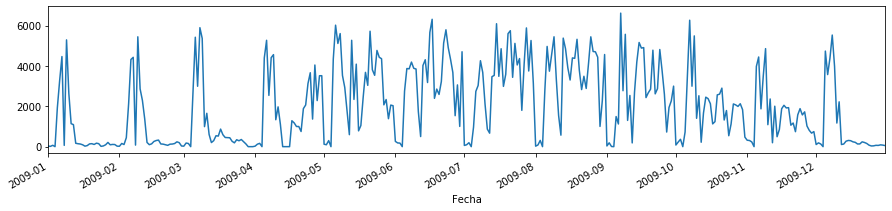

In [0]:
df.Producto1.plot(figsize=(15,3))

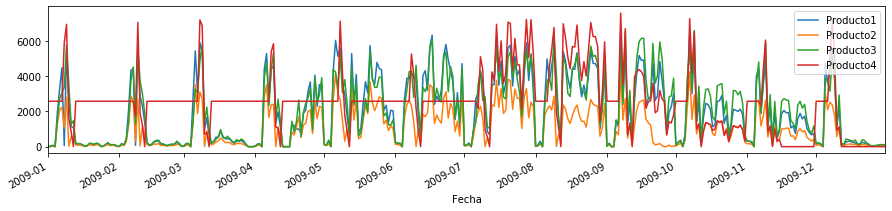

In [0]:
df.plot(figsize=(15,3))

Además de gráficos de línea, pandas tiene otro tipo de gráficos los cuales se puede usar con el argumento `kind` dentro del método DataFrame.plot(). Los otro gráficos disponibles son:

* `'bar'` or `'barh'` for bar plots
* `'hist'` for histogram
* `'box'` for boxplot
* `'kde'` or `'density'` for density plots
* ‘`'area'` for area plots
* `'scatter'` for scatter plots
* `'hexbin'` for hexagonal bin plots
* `'pie'` for pie plots

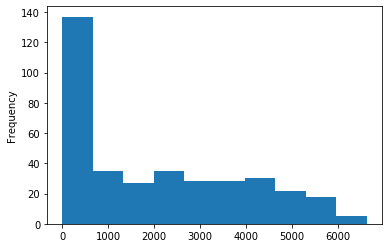

In [0]:
df.Producto1.plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f174ac4f9e8>]],
      dtype=object)

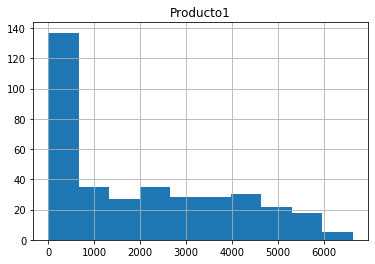

In [0]:
df.hist(column='Producto1')

<p><a name="operacionesColFil"></a></p>

## 1.6. Operaciones con columnas y filas
La función `apply` regresa algún valor después de aplicarle una función a cada columna/fila del dataframe. 


In [0]:
df.Producto3

Fecha
2009-01-01     35
2009-02-01     22
2009-03-01     22
2009-04-01     15
2009-05-01    141
             ... 
2009-12-27     52
2009-12-28     99
2009-12-29    115
2009-12-30    115
2009-12-31    112
Name: Producto3, Length: 365, dtype: int64

In [0]:
df['Producto3sqrt']=df.Producto3.apply(np.sqrt)

In [0]:
df.tail()

,Producto1,Producto2,Producto3,Producto4,Producto3sqrt
Fecha,,,,,
2009-12-27,66,29,52,0.0,7.211103
2009-12-28,61,41,99,0.0,9.949874
2009-12-29,89,52,115,0.0,10.723805
2009-12-30,76,43,115,0.0,10.723805
2009-12-31,53,46,112,0.0,10.583005


In [0]:
df[['Producto1','Producto2']].apply(np.sum, axis=0)

Producto1    738912
Producto2    386992
dtype: int64

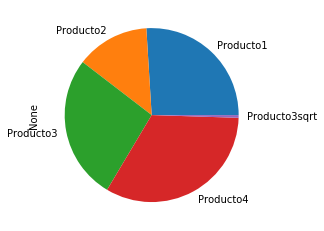

In [0]:
df.apply(np.sum, axis=0).plot(kind='pie')

<p><a name="agrupacion"></a></p>

## 1.7. Agrupando dataframes
El comando `groupby` permite agrupar y generar calculos y operaciónes sobre los valores agrupados.

In [0]:
df["month"] = [i.month for i in df.index]
df

,Producto1,Producto2,Producto3,Producto4,Producto3sqrt,month
Fecha,,,,,,
2009-01-01,29,20,35,2576.359551,5.916080,1
2009-02-01,19,3,22,2576.359551,4.690416,2
2009-03-01,24,12,22,2576.359551,4.690416,3
2009-04-01,24,8,15,2576.359551,3.872983,4
2009-05-01,120,111,141,2576.359551,11.874342,5
...,...,...,...,...,...,...
2009-12-27,66,29,52,0.000000,7.211103,12
2009-12-28,61,41,99,0.000000,9.949874,12
2009-12-29,89,52,115,0.000000,10.723805,12


In [0]:
df.groupby("month")

In [0]:
df.groupby("month").max()

,Producto1,Producto2,Producto3,Producto4,Producto3sqrt
month,,,,,
1,5298,2796,5765,6939.0,75.927597
2,5451,2868,5517,7052.0,74.276510
3,5904,3523,5762,7194.0,75.907839
4,5278,3499,5327,5837.0,72.986300
5,6028,4120,5397,7121.0,73.464277
6,6320,3499,6047,5259.0,77.762459
7,6100,3825,5536,7219.0,74.404301
8,5452,2865,6379,7044.0,79.868642
9,6626,4227,6535,7575.0,80.839347


In [0]:
df.groupby("month")["Producto1"].count()

month
1     31
2     28
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: Producto1, dtype: int64

<p><a name="renormalizacion"></a></p>

## 1.8. Rescalado de datos (estadarización y normalización)
En algunos algoritmos de Machine Learning (ML) es importante tener los datos, rescalados para evitar obtener resultados sesgados debido a la escala de los datos. 

La función `scale` se encarga de escalar los datos quedando con una media de 0 y una desviación estandar de 1

In [0]:
from sklearn import preprocessing

In [0]:
scaled=preprocessing.scale(df[['Producto4', 'Producto3sqrt']])

In [0]:
scaled

array([[-2.62892112e-16, -1.39909791e+00],
       [-2.62892112e-16, -1.45074910e+00],
       [-2.62892112e-16, -1.45074910e+00],
       [-2.62892112e-16, -1.48519684e+00],
       [-2.62892112e-16, -1.14800841e+00],
       [-2.62892112e-16, -1.00102135e+00],
       [-2.62892112e-16, -1.27148566e+00],
       [-2.62892112e-16, -1.49073110e+00],
       [-2.62892112e-16, -1.41002203e+00],
       [-2.62892112e-16, -1.27384884e+00],
       [-2.62892112e-16, -9.11236397e-01],
       [-2.62892112e-16, -1.09895318e+00],
       [-2.62892112e-16, -1.09573053e+00],
       [-2.62892112e-16, -1.09093149e+00],
       [-2.62892112e-16, -1.09573053e+00],
       [-2.62892112e-16, -1.23336515e+00],
       [-2.62892112e-16, -1.45994772e+00],
       [-2.62892112e-16, -1.33588081e+00],
       [-2.62892112e-16, -1.04946799e+00],
       [-2.62892112e-16, -1.08934097e+00],
       [-2.62892112e-16, -1.15515737e+00],
       [-2.62892112e-16, -1.04503679e+00],
       [-2.62892112e-16, -1.12714948e+00],
       [-2.

In [0]:
scaled.mean(axis=0)

array([-3.60367507e-16,  1.94669243e-16])

In [0]:
scaled.std(axis=0)

array([1., 1.])

La normalización consiste en rescalar los datos de tal manera que queden en un rango entre 0 y 1. La función `normalize` permite realizar este proceso fácilmente.


In [0]:
normalized = preprocessing.normalize(df[['Producto1']],norm='max', axis=0)
normalized

array([[0.0043767 ],
       [0.00286749],
       [0.00362209],
       [0.00362209],
       [0.01811047],
       [0.03939028],
       [0.00905524],
       [0.00362209],
       [0.00528222],
       [0.01222457],
       [0.04799276],
       [0.01584666],
       [0.02535466],
       [0.02188349],
       [0.0197706 ],
       [0.01403562],
       [0.00377302],
       [0.00784787],
       [0.0205252 ],
       [0.02218533],
       [0.01645035],
       [0.02595835],
       [0.02233625],
       [0.00226381],
       [0.00528222],
       [0.01403562],
       [0.03154241],
       [0.0138847 ],
       [0.01660127],
       [0.01584666],
       [0.00377302],
       [0.00211289],
       [0.02384546],
       [0.02701479],
       [0.01841232],
       [0.01433746],
       [0.02792031],
       [0.01433746],
       [0.01237549],
       [0.02867492],
       [0.0344099 ],
       [0.04618171],
       [0.02837308],
       [0.03154241],
       [0.01479022],
       [0.02097797],
       [0.03893752],
       [0.045

In [0]:
print(normalized.max())
print(normalized.min())

1.0
0.0


<p><a name="concom"></a></p>

## 1.9. Concatenación y combinación de dataframes

La concatenación se realiza mediante la función `concat()` y la combinación mediante la función `merge()`

In [0]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [0]:
data1

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [0]:
data2

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [0]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [0]:
# Concatenar por filas
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [0]:
# Concatenar por columnas
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [0]:
all_data_col.columns

Index(['subject_id', 'first_name', 'last_name', 'subject_id', 'first_name',
       'last_name'],
      dtype='object')

In [0]:
all_data_col['subject_id']

,subject_id,subject_id
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


In [0]:
# Combinar all_data y data3 a lo largo del valor de subject_id
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [0]:
pd.merge(all_data, data3, on='subject_id',how='left')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51.0
1,2,Amy,Ackerman,15.0
2,3,Allen,Ali,15.0
3,4,Alice,Aoni,61.0
4,5,Ayoung,Atiches,16.0
5,4,Billy,Bonder,61.0
6,5,Brian,Black,16.0
7,6,Bran,Balwner,NaN
8,7,Bryce,Brice,14.0
9,8,Betty,Btisan,15.0


In [0]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (interseccion)
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [0]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (union)
pd.merge(data1, data2, on='subject_id', how='outer')



,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [0]:
pd.merge(data1,data2, on=['first_name','last_name'], how='outer')

,subject_id_x,first_name,last_name,subject_id_y
0,1,Alex,Anderson,NaN
1,2,Amy,Ackerman,NaN
2,3,Allen,Ali,NaN
3,4,Alice,Aoni,NaN
4,5,Ayoung,Atiches,NaN
5,NaN,Billy,Bonder,4
6,NaN,Brian,Black,5
7,NaN,Bran,Balwner,6
8,NaN,Bryce,Brice,7
9,NaN,Betty,Btisan,8


<p><a name="example"></a></p>

# Ejemplo de preprocesado de datos

[[Contenidos]](#contents)

Trataremos un ejemplo de una base de datos de una tabla de características de marcas de carros.

De esta base de datos, pretendemos resolver el siguiente problema


**Cual es la tasa de consumo en Litros por cada 100 km para un carro diesel?**

## Importe de datos

Los datos en crudo se pueden encontrar en la dirrección  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

**Importar panda y matplotlib.pyplot:**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

### Lectura de los datos desde un url

In [0]:
archivo = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

### Cabecera

In [0]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

### Carga de datos desde el url

Para esto usamos el método `read_csv()`

In [0]:
df = pd.read_csv(archivo, names = headers)

### Inspección del archivo

Recordemos que podemos usar el método head()

In [0]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Podemos observar que muchas de las entradas están etiquetadas con el símbolo `?`. Esto corresponde datos faltantes que pueden dificultar un análisis.

Los pasos que debemos seguir a continuación son:



1.   Identificar los valores faltantes
2.   Tratar los valores faltantes.
3.   Corregir el formato de los datos.



## Identificación de valores faltantes y tratamiento.


### Conversión de `?` a `NaN`

Quienes llenaron esta tabla, identificaron los valores faltantes como `?`.  Por razones de tiempo de computo y conveniencia, replazaremos estos signos de interrogación por `NaN`, para lo cual debemos importantar antes la librería numéricas de python numpy. 

Para realizar el reemplazo usaremos el método `replace()`.

In [0]:
import numpy as np

df.replace("?", np.nan, inplace = True) # No olvidarse de usar inplace.
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Identificación y conteo de valores faltantes:

Apliquemos el método `isnull()` y utilicemos la función de agregación `sum()`

In [0]:
datos_faltantes = df.isnull().sum()
datos_faltantes

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

De acuerdo a la información anterior tenemos los siguientes datos faltantes.
<ol>
    <li>"normalized-losses": 41 </li>
    <li>"num-of-doors": 2 </li>
    <li>"bore": 4 </li>
    <li>"stroke" : 4 </li>
    <li>"horsepower": 2 </li>
    <li>"peak-rpm": 2 </li>
    <li>"price": 4 </li>
</ol>

## Tratamiento de los datos faltantes

<ol>
    <li>Eliminar el dato entero<br>
        a. Eliminar la fila entera<br>
        b. Eliminar la columna entera
    </li>
    <li>Reemplazar el dato<br>
        a. Reemplazar por la media<br>
        b. Reemplazar por la moda<br>
        c. Reemplazar basados en otra función
    </li>
</ol>

Solo debemos eliminar una columna si la mayoria de entradas son vacias. En nuestro caso, ninguna de las columnas cumplen con este criterio como para ser eliminadas. 

En este caso tenemos cierta libertad para aplicar diferences métodos de llenado de datos faltantes; no obstante, algunos métodos pueden resultar más adecuados que otros. Aplicaremos los siguientes métodos para cada columna:

<b>Reemplazo por la media:</b>
<ul>
    <li>"normalized-losses": 41 datos faltantes</li>
    <li>"stroke": 4 datos faltantes</li>
    <li>"bore": 4 datos faltantes</li>
    <li>"horsepower": 2 datos faltantes</li>
    <li>"peak-rpm": 2 datos faltantes</li>
</ul>

<b>Replace por la moda:</b>
<ul>
    <li>"num-of-doors": 2 dátos faltantes que serán reemplazados por "four". 
        <ul>
            <li>Razón: 84% de los sedan son 4 puertas. Dado que los carros cuatro puertas son los más frecuentes, la probabilidad de ocurrencia es mayor.</li>
        </ul>
    </li>
</ul>

<b>Eliminación de una fila entera:</b>
<ul>
    <li>"price": 4 datos faltantes
        <ul>
            <li>Razón: Como, eventualmente, el precio es algo que se puede predecir, ninguna entrada sin precio puede ser usada para una predicción; por ende, cualquier fila sin precio no será útil.</li>
        </ul>
    </li>
</ul>

### Cálculo del valor medio

In [0]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Promedio de normalized-losses:", avg_norm_loss)

Promedio de normalized-losses: 122.0


Reemplazo de  "NaN" por el promedio en la columna "normalized-losses":

In [0]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Calculo del valor medio para la columna 'bore':

In [0]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


Reemplazo de `NaN` por  el valor medio

In [0]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

**Ejercicio: De acuerdo a lo anterior reemplace los valores faltantes de la columna stroke por su valor medio**

De doble click <b>aquí</b> para ver la solución:

<!-- The answer is below:

# Cálculo del valor medio:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# Reemplazo de los valores faltantes por el valor medio
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

-->

Cálculo del valor medio de la columna 'horsepower' y reemplazo en los valores faltantes:

In [0]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


Columna de 'peak-rpm':

In [0]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


Para ver cuáles valores están presentes en una columna particular, podemos usar el método `value_counts()`:

In [0]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Vemos que los carros de cuatro puertas son los más comunes. También podemos usar el método `.idxmax()` para calcular el tipo más común automaticamente:

In [0]:
df['num-of-doors'].value_counts().idxmax()

'four'

Reemplazamos en la columna 'num-of-doors' los valores vacios por la moda:

In [0]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finalmente, eliminemos todas las filas de carros sin precios:

In [0]:
# Eliminación de columnas sin precio mediante dropna
df.dropna(subset=["price"], axis=0, inplace=True)

# Reinicio de los indices
df.reset_index(drop=True, inplace=True)

Apariencia de la tabla luego de preprocesarla

In [0]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Corrección de datos

<p>El último paso en el preprocesado de los datos consiste en revisar de que todos los datos estén en el formato adecuado(int, float, text u otro).</p>

Podemos usar en Pandas
<p><b>.dtypes()</b>  para ver el tipo</p>
<p><b>.astype()</b> para cambiar el tipo</p>

### Lista de tipos

In [0]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p> Se puede observa que algunas columnas no tienen el tipo correcto.
  
  Las variables numéricas deben ser de tipo 'float' o 'int', y las variables con caracteres, como categorias, deben ser del tipo 'object'. Por ejemplo, 'bore' (diámetro del cilindro) y 'stroke' (ciclos/tiempos) son variables numéricas que describen el motor, esperamos entonces que sean de tipo 'float' o 'int'; no obstante, son de tipo 'object'. Debemos convertirlas a un tipo adecuado usantdo el método "astype()".</p> 



### Conversión al tipo adecuado:

In [0]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [0]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Hemos obtenido, finalmente, un conjunto de datos correcto, sin datos faltantes y en un formato correcto.

<p><a name="catvar"></a></p>

# 2. Manipulación de variables categóricas

[[Contenidos]](#contents)

Las variables categóricas son aquellas que contienen etiquetas en vez de valores numéricos. Exiten variables categóricas ordinales y nominales, las primeras son aquellas que tienen algún tipo de jeraquización, como por ejemplo el nivel de escolaridad:*primaria, secundaria, universitaria*; las segunas son aquellas que no se pueden ordenar como profesión: *abogado, médico, ingeniero* . Según el problema que se desea resolver y el tipo de variables categóricas, estás deben tener un tratamiento diferente.

Para ver más tipos de codificación ver: https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159

<p><a name="opevec"></a></p>

## 2.1. Operaciones vectorizadas con `strings`

[[Contenidos]](#contents)

Python ofrece una relativa facilidad en el manejo y manipulación de datos de tipo `str`. Pandas se basa en esto y proporciona un conjunto integral de operaciones vectorizadas

NumPy no proporciona un acceso tan simple. Por ejemplo, para escribir con mayúscula la primera letra de las entradas de un arreglo podemos escribir:



In [0]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']       
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

Quizás esto sea suficiente para trabajar con algunos datos, pero no funcionará si faltan valores:

In [0]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']       
[s.capitalize() for s in data]

AttributeError: ignored

Pandas incluye opciones para abordar tanto el manejo de operaciones vectorizadas como el manejo correcto de los datos faltantes a través del atributo `str` de los objetos `series` e `index` de Pandas

In [0]:
names = pd.Series(data)    
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

Realicemos la operación anterior mediante el atributo `str` (note que se omiten los valores nulos)


In [0]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

Casi todos los métodos incorporados de Python para el manejo de cadenas se reflejan en un método de vectorizado de cadenas de Pandas. Algunos de estos métodos son

*   `len()`
*   `lower()`
* `upper()`
*  `startswith()`
* `contains()`
*  `split()`
* `get()`
* `strip()`
* `replace()`



In [0]:
monte = pd.Series([' Graham Chapman ', ' John Cleese', 'Terry Gilliam ', 'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0     Graham Chapman 
1         John Cleese
2      Terry Gilliam 
3           Eric Idle
4         Terry Jones
5       Michael Palin
dtype: object

In [0]:
# entradas en letra minúscula (str)
monte.str.lower() 

0     graham chapman 
1         john cleese
2      terry gilliam 
3           eric idle
4         terry jones
5       michael palin
dtype: object

In [0]:
# si la entrada contiene la letra T (bol)
monte.str.contains('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [0]:
# separar por palabra (list)
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [0]:
# obtener el apellido de cada entrada
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

Para una guia completa visitar: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

<p><a name="varord"></a></p>

## 2.2. Variables ordinales: Codificación de enteros

[[Contenidos]](#contents)

La codificación entera (Integer Encoding) consiste en asignar un valor entero a cada uno de los valores ordenados, según correponda.  

El dataset que utilizaremos contiene información de una encuesta laboral realizda en los estados unidos en la que se pretende ver el nivel de ingresos de las personas con base a variables socio-económicas

In [0]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


Note que este tipo de implementación ya está hecha en el dataset para el caso del nivel educativo en las columnas education y education-num

In [0]:
df[['education','education-num']].drop_duplicates().sort_values(by='education-num')

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


Con la función map es fácil de implementar en python. Por ejemplo para la columa class índiquemos con $1$ los $\leq 50$ y con $2$ los $>50$

In [0]:
df['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [0]:
df['class-num']=df['class'].map({'<=50K':1, '>50K':2})

In [0]:
df[['class-num','class']].head()

,class-num,class
0,1,<=50K
1,1,<=50K
2,1,<=50K
3,1,<=50K
4,1,<=50K


<p><a name="varnom"></a></p>

## 2.3. Variables nominales: Condificación one-hot (dummy variables)

[[Contenidos]](#contents)

La codificación one-hot consiste asignar valores binarios $[1, 0]$ a las variables categóricas, en las que cada valor de la variable se convierte en un campo nuevo y se asigna el valor $[1, 0]$ si el evento contiene o no la variable según sea el caso.


In [0]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

Pandas viene con el comando `pd.get_dummies()` que facilita el trabajo y realiza la codeificación one-hot de forma muy sencilla. Note que al implementar este comando, el campo `sex` se elimina y solo quedan las variables dummy

In [0]:
pd.get_dummies(df.sex).head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


Se puede implementar para el dataset completo y el comando `pd.get_dummies()` solo aplica sobre las variables categóricas.

In [0]:
pd.get_dummies(df).head()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,class-num,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_<=50K,class_>50K
0,2,77516,13,1,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3,83311,13,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,215646,9,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,234721,7,0,0,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,338409,13,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Aplicar este tipo de codificación puede aumentar significativamente el número de variables. Esto depende de la cantidad de posibles valores que tengan las variables categóricas

In [0]:
len(df.columns)

16

In [0]:
len(pd.get_dummies(df).columns)

108

<p><a name="intro"></a></p>

# 3. Análisis exploratorio de datos:

El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

<ol>
  <li>Resumir las principales características del conjunto de datos.</li>
  <li>Entender mejor el conjunto de datos que se está tratando.</li>
  <li>Establecer relaciones entre variables.</li>
  <li>Determinar si una variables es un buen predictor de una variable blanco.</li>
  <li>Extraer las variables más importantes.</li>
</ol>

**Objetivo:** Determinar las características que más impactan en lo que se busca establecer.

Para abordar el análisis exploratorio de datos, es útil aplicar las siguientes técnicas:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento de datos</li>  
  <li> Correlación (Mapas de correlación)</li>
</ol>

En primer lugar, carguemos el dataset de caractarísticas de carros que vamos a analizar.

In [0]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [0]:
#Apariencia de la tabla de datos
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [0]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [0]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

Antes de ponernos en la tarea de construir un modelo que pretenda predecir alguna característica del conjunto de datos, es importante realizar una exploración de los datos. La **estadística descriptiva** nos permite explorar los datos con el propósito de hallar las características principales, mediante la implementación de gráficas y el cálculo de algunas variable estadísticas. Para este fín, en Python, podemos hacer uso de:

<ol>
  <li>Métodos: <code>.describe()</code>, el cual permite obtener un resumen estadístico de las <b>variables numéricas</b> en <code>pandas</code>, o la función <code>.value_counts()</code>, la cual permite contabilizar variables categóricas .</li>
    <li>Box plots. </li>
    <li>Gráficos de dispersión. </li>
</ol>

<p><a name="des_count"></a></p>

## 3.1 Metodos .describe() y .value_counts()

In [0]:
# Para dar una descripción estadística de variables numéricas:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Por ejemplo, la variable "drive-wheels" describe la tracción de los vehiculos consignados en la tabla; son variables categóricas que representan:

<ol>
    <li>fwd - Front Wheel Drive: Tracción delantera.</li>
    <li>rwd - Rear Wheel Drive: Tracción Tracera.</li>
    <li>4wd - 4 Wheel Drive: Tracción de cuatro ruedas.</li>
</ol>

Para contabilizar esta variable usamos el método <code>.value_counts()</code>

In [0]:
# Para contabilizar variables categóricas:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

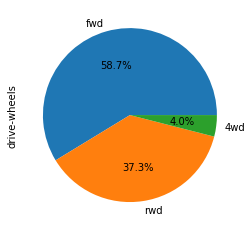

In [0]:
df["drive-wheels"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

<b>Ejercicio</b>: Guarde el número de cuentas por tipo de tracción en un nuevo DataFrame, renombre la columna a "value_counts" y establezca el nombre de los índices como "drive-wheels".

De doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:
#Definición del dataFrame
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
# Renombramiento de la columna a value_counts
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
#Renimbramiento de los índices
drive_wheels_counts.index.name='drive_wheels'
#Visualización del dataFrame:
drive_wheels_counts
--->

La función `value_counts` también permite contabilizar las variables numéricas. Por ejemplo, "width" representa el ancho de los carros:

In [0]:
df["width"].value_counts()

0.886111    24
0.923611    23
0.908333    15
0.950000    10
0.894444    10
0.888889     9
0.883333     9
0.909722     8
0.905556     7
0.933333     6
0.891667     6
0.920833     6
0.911111     6
0.929167     5
0.900000     4
0.956944     4
0.943056     4
0.912500     4
0.902778     3
0.995833     3
0.887500     3
0.991667     3
0.976389     3
0.897222     2
0.940278     2
0.966667     2
0.890278     2
0.918056     2
0.948611     2
0.944444     1
0.868056     1
0.916667     1
0.979167     1
0.880556     1
0.919444     1
0.858333     1
0.955556     1
0.980556     1
0.837500     1
0.922222     1
0.984722     1
0.925000     1
1.000000     1
Name: width, dtype: int64

<p><a name="bPlot"></a></p>

## 3.2 Box Plots

[Contenidos](#contents) 

Los box plot representan gráficas en las que se pueden analizar varias características de un conjunto de datos como:

<ol>
    <li> La distribución de los datos.</li>
    <li> Asimetría.</li>
    <li> Los puntos aislados.</li>
</ol>

En la siguiente gráfica se muestran las diferentes partes de una gráfica de caja:

<img src="https://imgbb.com/"><img src="https://i.ibb.co/6tkRtg0/Captura-de-pantalla-2019-08-22-19-01-17.png" style="width:250px;height:300px;" alt="Captura-de-pantalla-2019-08-20-22-39-39" border="0"></a>

En esta gráfica, podemos identificar las siguiente cantidades:

<ol>
    <li> Mediana.</li><br>
    <li> Cuartil superior $P_{75}.$</li><br>
    <li> Cuartil inferior $P_{25}$</li><br>
    <li>Rango intercuartil $IQR=P_{75}-P_{25}$</li><br>
    <li>Extremo superior 
    $UE=$\begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}<br> </li><br>
    <li>Extremo inferior $LE=$\begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}<br></li>
</ol>

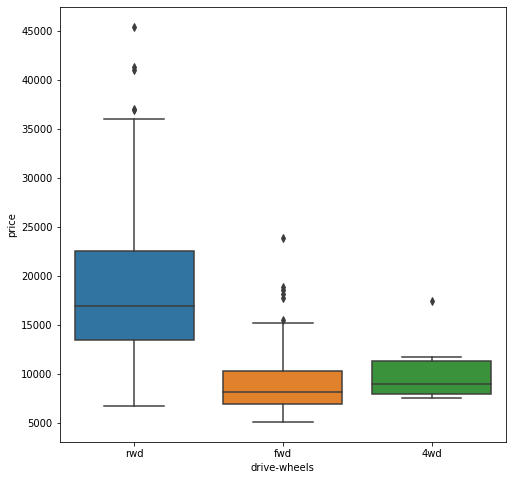

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
sns.boxplot(x="drive-wheels",y="price", data=df)

En este caso se tiene que:

<ol>
    <li> Mediana: rwd $\rightarrow$ 16900, fwd $\rightarrow$ 8192 y 4wd$\rightarrow$9005.5</li><br>
    <li> Cuartil superior: $P_{75\text{-rwd}}\approx 22547.50$, $P_{75\text{-fwd}}\approx 10333$ y $P_{75\text{-4wd}}\approx 11368$</li><br>
    <li> Cuartil inferior: $P_{25\text{-rwd}}= 13455$, $P_{25\text{-fwd}}\approx 6951$ y $P_{25\text{-4wd}}\approx 7984$</li><br>
    <li>Rango intercuartil: $IQR_{\text{rwd}}\approx 9023$, $IQR_{\text{fwd}}\approx 3381$ y $IQR_{\text{4wd}}\approx 3384$</li><br>
    <li>Extremo superior \[UE= \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}\]<br>
        Por ejemplo, $UE_{\text{rwd}}= P_{\text{75}\text{rwd}}+1.5\times IQR_{\text{rwd}}\rightarrow UE_{\text{rwd}}=22547.50+(22547.50-13455.00)\times1.5 \therefore UE_{\text{rwd}}=36186.25$, ya que $UE_{\text{rwd}}<\text{max(Data)}$. </li><br>
    <li>Extremo inferior \[LE= \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}\]<br>
    Por ejemplo, $LE_{\text{rwd}}=\text{min(Data)}\rightarrow LE_{\text{rwd}}=6785$, ya que se cumple que $LO\leq \text{min(Data)}$. </li><br>
</ol>

In [0]:
df.groupby(["drive-wheels"]).price.describe()

,count,mean,std,min,25%,50%,75%,max
drive-wheels,,,,,,,,
4wd,8.0,10241.000000,3288.211064,7603.0,7984.25,9005.5,11367.75,17450.0
fwd,118.0,9244.779661,3345.898257,5118.0,6950.75,8192.0,10332.50,23875.0
rwd,75.0,19757.613333,9082.575728,6785.0,13455.00,16900.0,22547.50,45400.0


Los box plots, o diagramas de cajas permiten comparar facilmente diferentes grupos. En este ejemplo, mediante el uso de diagramas de cajas podemos ver diferentes categorías y sus distribuciones respecto al precio. 

Vemos que, por ejemplo, que el precio de los carros de tracción trasera (rwd) son distintos a los de otras categorias, no obstante, el precio de los carros de tracción delantera y $4\times4$ son casi indistinguibles.

**Ejercicio:** Use un diagrama de cajas para determinar si la variable "body-style" y "engine-location", la cual determina el tipo de carro, es un buen predictor del precio. Argumente su respuesta.

De click **aquí** para ver la respuesta.

<!--- Respuesta:
#Celda 1:
sns.boxplot(x="body-style", y="price", data=df)
# Argumentación: Se puede observar que el precio de los carros para los diferentes tipos de carros presenta una superposición significativa, de tal forma que la variable "body-style" no sería un predictor adecuado del precio
#Celda 2:
sns.boxplot(x="engine-location", y="price", data=df)
# Argumentación: Puede observarse qu la distribución de los precios entre las subcategorias fron y rear son lo suficiente diferentes como para considerar la variable categórica "engine-location" como un predictor adecuado del precio.
--->

<p><a name="sPlot"></a></p>

## 3.3 Scatter plots

[Contenidos](#contents) 

Dentro de nuestros datos podemos tener en varias ocaciones variables continuas. Este tipo de datos representan puntos dentro de un rango. En el conjunto de datos que estamos trabajando, por ejemplo, las variables correspondientes a las columnas **"price"** y **"engine-size"** son variables continuas. ¿Qué deberiamos hacer si queremos predecir el precio a partir del tamaño del motor?.

Una forma rápida para inspeccionar este tipo de relaciones consiste en realizar un scatter plot de ambas variables. Cada observación en el scatter plot es representada  como un punto. Este tipo de gráficas representa la relación ente ambas variables. La variable predictora representa la variable que se usa para predecir un determinado resultado. Por otra parte, la variable diana o blanco, corresponde a la variable que se pretende predecir. En nuestro caso tenemos que:

<ol>
    <li>Variable objetivo o blanco: "price".</li>
    <li>Variable predictora: "engine-size".</li>
</ol>

En una gráfica de dispersión, usualmente el eje x, o eje horizontal, se hace coincidir con la variable predictora y el eje y, o eje vertical, con la variable diana.

Veamos ahora como se relacionan las variables "price" y "engine-size".

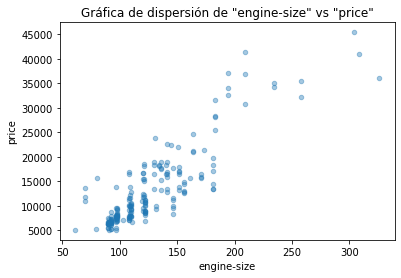

In [0]:
df.plot(kind="scatter", y = "price", x = "engine-size", title = "Gráfica de dispersión de \"engine-size\" vs \"price\"", alpha = 0.4)

<p><a name="hmaps"></a></p>

## 3.4 Groupby y Heatmaps

[Contenidos](#contents)

Recordemos que con el método groupby podemos agrupar los datos en diferentes categorías. Los datos son agrupados con base en una o varias características y el análisis se realiza sobre los grupos individuales. Veamos esto.

Agrupemos, por ejemplo la tabla por tipo de tracción ("drive-wheels"). Podemos observar que tenemos tres tipos de categorias.

In [0]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Definamos un subdataFrame con las columnas 'drive-wheels', 'body-style' y 'price' y agrupemos por 'drive-wheels' para calcular el valor medio en cada categoria:

In [0]:
df_group = df[['drive-wheels','body-style','price']]

# Agrupamiento de los resultados
df_grupo1 = df_group.groupby(['drive-wheels'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
df_grupo1

,drive-wheels,price
0,rwd,19757.613333
1,4wd,10241.000000
2,fwd,9244.779661


De los datos, se puede ver que los carros con tracción tracera son, en promedio, los mas caros. Por otra parte, los carros de tracción delantera y tracción total son, en promedio, similares. 

Podemos agrupar de acuerdo a varias variables. Por ejemplo, agrupemos por 'drive-wheels' y 'body-style'. Este procedimento agrupara el dataframe por combinaciones unicas de 'drive-wheels' y 'body-style'. Guardemos el resultado en la variable de prueba 'grupo_test'

In [0]:
# grouping results
grupo_test = df_group.groupby(['drive-wheels','body-style'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
grupo_test

,drive-wheels,body-style,price
0,rwd,hardtop,24202.714286
1,rwd,convertible,23949.600000
2,rwd,sedan,21711.833333
3,rwd,wagon,16994.222222
4,rwd,hatchback,14337.777778
5,4wd,sedan,12647.333333
6,fwd,convertible,11595.000000
7,fwd,wagon,9997.333333
8,fwd,sedan,9811.800000
9,4wd,wagon,9095.750000


Este tipo de tablas es más facil visualizarlas cuando se convierten en una tabla pivote. Como en Excel, en las tablas pivote podemos visualizar los datos especificando una variable categórica a lo largo de las columnas y otra variable categórica a lo largo de las filas.

En este caso, la categoria "drive-wheel" le asignaremos las filas de la tabla, y realizacemos un pivote en "body-style" para convertirla en las columnas de la tabla:

In [0]:
grouped_pivot = grupo_test.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

En muchas ocaciones, tenemos valores nulos para algunas celdas de la tabla. Podemos rellenar estos casos con un valor 0.

---



In [0]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

El uso de heatmaps nos permite visualizar el comportamiento del precio en función de dos variables. Por ejemplo, pordemos visualizar la tabla pivote anterior como una imagen de píxeles con el color correspondiente al valor del precio. De esta forma, podemos ver, por ejemplo, como se relaciona el precio con el tipo de tracción y el tipo de carro:

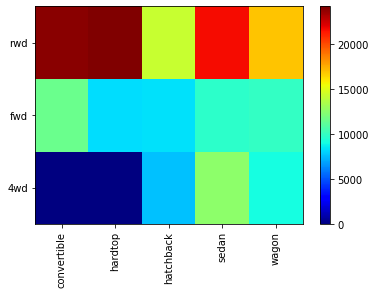

In [0]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='jet')

#labels
col_labels = grouped_pivot.columns.levels[1]
row_labels = grouped_pivot.index

#move ticks to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(col_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

#rotate the labels
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p><a name="corr"></a></p>

## 3.5 Correlación

[Contenidos](#contents)

La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

Existen algunos tipos comunes de pruebas para medir la correlación, estos son: Pearson, Spearman y Kendall. Cada uno tiene sus propias suposiciones sobre los datos que deben cumplirse para que la prueba pueda medir con precisión el nivel de correlación. Veamos cómo están distribuidas nuestras variables:

* Para la correlación de Pearson, ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.

* Las correlación de Spearman es no paramétrica y no hace suposiciones sobre la distribución de los datos. Debe haber una relación monotónica entre las variables.

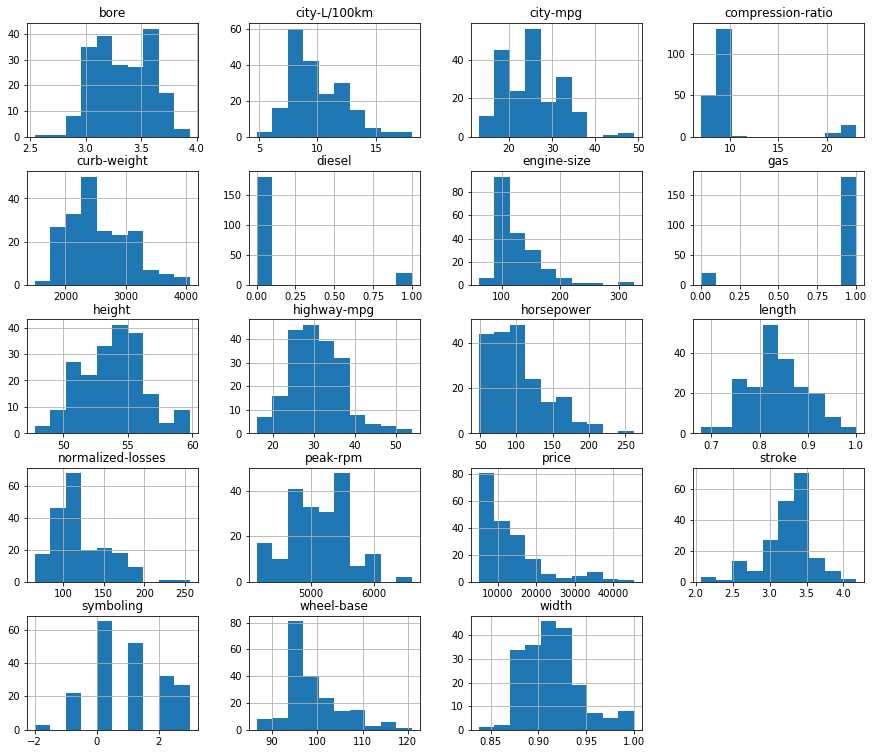

In [0]:
df.hist(figsize=(15,13))
plt.show()

En el caso de la correlación de Pearson, las suposiciones de normalidad de la distribución y homogeneidad de la varianza se pueden evaluar mediante las funciones `skewtest()` y `levene()`, respectivamente. Ambas pertenecientes al módulo `scipy.stats`. Evaluemos las suposiciones para las variables "price" y "engine-size"

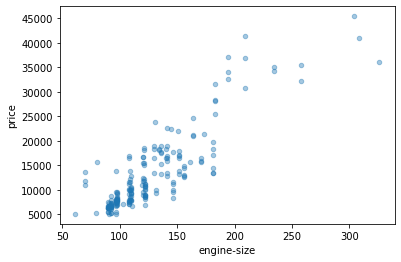

In [0]:
# test linearity
df.plot(kind="scatter", y = "price", x = "engine-size", alpha = 0.4)

In [0]:
from scipy.stats import skewtest, levene

# test the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.
print(skewtest(df["price"]))
print(skewtest(df["engine-size"]))

# test the null hypothesis that all input samples are from populations with equal variances
print(levene(df["price"],df["engine-size"]))

# A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.

SkewtestResult(statistic=7.639137730516152, pvalue=2.186812829722033e-14)
SkewtestResult(statistic=8.058856418726215, pvalue=7.701148913242647e-16)
LeveneResult(statistic=140.81734743196424, pvalue=4.916938115048979e-28)


Observamos que sí hay una relación lineal entre las variables. Sin embargo, los tests de uniformidad de la distribución y homogeneidad arrojan resultados negativos. Por lo tanto, la prueba de correlación apropiada para usar sería una prueba no paramétrica como la correlación de Spearman.

Para calcular el coeficiente de correlación podemos utilizar el método `corr()` de Pandas

In [0]:
corr_p = df.corr()
corr_s = df.corr(method = "spearman")

corr_p

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Veamos cómo se correlaciona el atributo precio con los demás atributos

In [0]:
corr_p["price"].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
diesel               0.110326
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
gas                 -0.110326
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [0]:
corr_s["price"].sort_values(ascending=False)

price                1.000000
curb-weight          0.913767
horsepower           0.849142
city-L/100km         0.831284
engine-size          0.828417
width                0.812097
length               0.810331
wheel-base           0.681790
bore                 0.645943
height               0.263806
normalized-losses    0.202034
diesel               0.144657
stroke               0.117582
peak-rpm            -0.081912
symboling           -0.142683
gas                 -0.144657
compression-ratio   -0.177579
highway-mpg         -0.827265
city-mpg            -0.831284
Name: price, dtype: float64

Vemos que el precio del automóvil tiende a subir a medida que, por ejemplo, aumenta el tamaño del motor (engine-size), el ancho (width) y largo (length) del vehículo; no así de su altura (heigth) o del tipo de combustible que utiliza. El atributo más prometedor para predecir el precio del vehículo es el tamaño del motor (Pearson) y el peso del motor (Spearman).

Otra forma de verificar la correlación entre los atributos es usar el método `scatter_matrix`, que dibuja cada atributo numérico contra cualquier otro atributo numérico. Como tenemos 29 columnas (se generarían $29^2=841$ gráficos), grafiquemos solo algunos de los atributos que tienen más correlación con el precio:

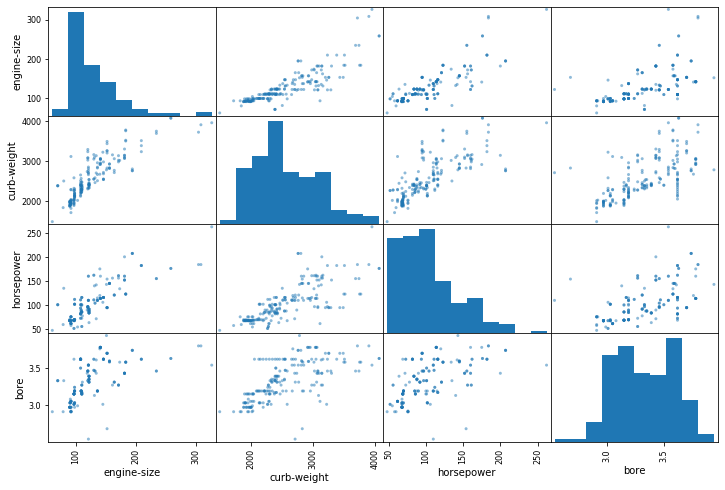

In [0]:
from pandas.plotting import scatter_matrix

attributes = ["engine-size","curb-weight","horsepower","bore"]

scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

La diagonal principal estaría llena de líneas rectas si Pandas dibujara cada variable contra sí misma, lo que no sería muy útil. En su lugar, Pandas muestra un histograma de cada atributo.

La librería `seaborn` nos permite realizar gráficos como el anterior o, por ejemplo, en un mapa de calor, mediante las funciones `pairplot()` y `heatmap()`, respectivamente.

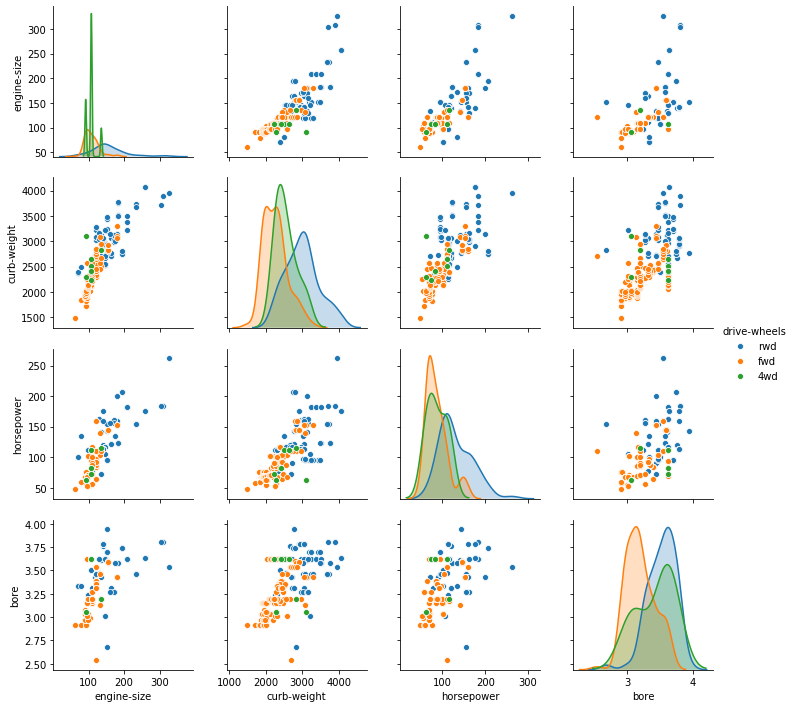

In [0]:
sns.pairplot(df, hue = "drive-wheels", vars = ["engine-size","curb-weight","horsepower","bore"])

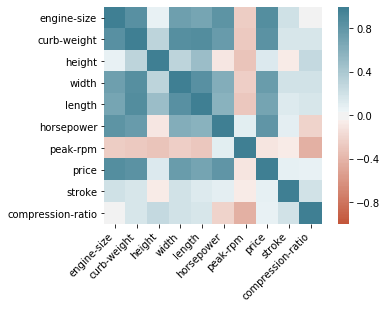

In [0]:
df_new = df[['engine-size','curb-weight','height','width','length','horsepower','peak-rpm','price','stroke','compression-ratio']]
corr_new = df_new.corr()

ax = sns.heatmap(
    corr_new, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Ejercicio

Para un conjunto de jugadores de la NBA, se desea evaluar si existe relación entre algunas variables asociadas a los jugadores. 

El dataset de la NBA ('https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv') contiene información de los jugadores, como su nombre, equipo, posición, edad, altura (pies-pulgadas), peso (libras) y salario anual.


## Pregunta 1

Cargar e inspeccionar el dataset

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:
import pandas as pd
import numpy as np

# Cargando el dataset
dfNBA=pd.read_csv('https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv')

#Inspeccionando el dataset
dfNBA.head()

dfNBA.columns

dfNBA.shape


--->

## Pregunta 2

Eliminar las filas que tengan el salario nulo y la columna number, ya que esta no tiene ninguna relevancia

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:
#Búsqueda de valores nulos
dfNBA.isnull().sum()

#Eliminando valores nulos
dfNBA.dropna(subset=['Salary'], inplace=True)
dfNBA.reset_index(drop=True, inplace=True)

#Eliminado columna Number
dfNBA.drop('Number', axis=1, inplace=True)
--->

##Pregunta 3

Convertir la estatura de pies-pulgadas a centímetros.

1 pie=30.48cm
1 pulgada=2.54cm

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:
#funcion para convertir de pies-pulgadas a centímetros
def conversion(a):
  pie,pulg=a.split("-")
  cms=int(pie)*30.48+int(pulg)*2.54
  return cms

#Convirtiendo la columna Height 
dfNBA['Height']=dfNBA['Height'].apply(conversion)
--->

## Pregunta 4

Construir un histograma con las cinco universidades con mas jugadores en la NBA

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

dfNBA['College'].value_counts().head().plot(kind='bar')

--->


## Pregunta 5

Construir un boxplot en el que se muestre los salarios vs las posiciones de los jugadores. Esto permite entender si los salarios varian significativamente dependiendo de la posición.

Las posibles posiciones son

* PG: point guard
* SG:shooting guard 
* SF: small forward 
* PF: power forward 
* C: center

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4.5, 4.5))
sns.boxplot(x="Position",y="Salary", data=dfNBA)

--->

## Pregunta 6

Obtener los cinco equipos que pagan los salarios mas altos (sumando toda la nómina de sus jugadores)

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

dfNBA.groupby(by='Team').Salary.sum().sort_values(ascending=False).head()

--->

## Pregunta 7

Construir una tabla pivot que muestre el salario promedio de los jugadores por equipo y posición para para los cinco equipos que pagan mejores salarios. Construir una representación visual de la información anterior usando heatmap. 

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

#Lista de los 5 equipos que pagan mayores salarios
topTeams=list(dfNBA.groupby(by='Team').Salary.sum().sort_values(ascending=False).head().index)

#Seleción del dataset de los 5 equipos que pagan mayores salarios
dfTop=dfNBA[dfNBA['Team'].isin(topTeams)]

#Construcción de tabla pivot 
pivotNBA=dfTop.pivot_table('Salary', index='Position',columns='Team')

#Construcción heatmap
fig, ax = plt.subplots()
im = ax.pcolor(pivotNBA, cmap='gist_rainbow')

#label names
row_labels = pivotNBA.columns
col_labels = pivotNBA.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivotNBA.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivotNBA.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()
--->

## Pregunta 8

Utilizar el método `scatter_matrix` para visualizar si existe algún tipo de correlación entre las variables numérocas del dataset

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from pandas.plotting import scatter_matrix

scatter_matrix(dfNBA, figsize=(12, 8))
plt.show()

--->

## Pregunta 9

Corroborar los resultados anteriores calculando los coeficientes de correlación de Pearson para las variables numéricas del dataset

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

dfNBA.corr(method ='pearson') 

--->

## Pregunta 10

Usar el método `pairplot` para evaluar visualizar si existe dependencia entre algunas de las variables numéricas y la posición de los jugadores.

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

sns.pairplot(dfNBA, hue = "Position")

--->